In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Ibrahim\\Classes\\Coven_Labs_Bootcamp'

In [3]:
heartData = pd.read_csv('./Datasets/Heart.csv', index_col = 0)

In [4]:
heartData.head(n = 5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
# summary statistics
summary_stat = heartData.describe()
summary_stat

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
# catch missing values
heartData.isnull().sum().sort_values()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
AHD          0
Thal         2
Ca           4
dtype: int64

In [7]:
# check for colums that are categorical and their corresponding number of columns
for col in heartData.columns:
    if heartData[col].dtypes == 'object':
        num_of_unique_cat = len(heartData[col].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(col_name = col, unique_cat = num_of_unique_cat))

Feature 'ChestPain' has '4' unique categories
Feature 'Thal' has '4' unique categories
Feature 'AHD' has '2' unique categories


In [8]:
heartData.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [9]:
dummy_1 = pd.get_dummies(heartData['ChestPain'])
dummy_2 = pd.get_dummies(heartData['Thal'])

In [10]:
dummy_2.head()

,fixed,normal,reversable
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,1,0


In [11]:
# drop chestpain and thal columns and add dummy_1 and dummy_2
heartData = heartData.drop(['ChestPain', 'Thal'], axis = 1)

In [12]:
heartData['Ca']

1      0.0
2      3.0
3      2.0
4      0.0
5      0.0
6      0.0
7      2.0
8      0.0
9      1.0
10     0.0
11     0.0
12     0.0
13     1.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     2.0
25     2.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
      ... 
274    0.0
275    2.0
276    0.0
277    1.0
278    0.0
279    1.0
280    0.0
281    1.0
282    0.0
283    1.0
284    0.0
285    1.0
286    3.0
287    2.0
288    NaN
289    0.0
290    0.0
291    0.0
292    0.0
293    0.0
294    2.0
295    0.0
296    0.0
297    2.0
298    0.0
299    0.0
300    2.0
301    1.0
302    1.0
303    NaN
Name: Ca, Length: 303, dtype: float64

In [13]:
heartData = pd.concat([heartData, dummy_1], axis = 1)
heartData = pd.concat([heartData, dummy_2], axis = 1)

In [14]:
# check again for missing values
heartData.isnull().sum().sort_values()

Age             0
fixed           0
typical         0
nontypical      0
nonanginal      0
asymptomatic    0
AHD             0
normal          0
Slope           0
ExAng           0
MaxHR           0
RestECG         0
Fbs             0
Chol            0
RestBP          0
Sex             0
Oldpeak         0
reversable      0
Ca              4
dtype: int64

In [15]:
heartData.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'AHD', 'asymptomatic', 'nonanginal',
       'nontypical', 'typical', 'fixed', 'normal', 'reversable'],
      dtype='object')

In [16]:
data = heartData[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'asymptomatic', 'nonanginal', 'nontypical', 'typical', 'fixed', 'normal', 'reversable']]
target = heartData['AHD']
# heartData = heartData.drop(['AHD'], axis = 1)

In [17]:
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,asymptomatic,nonanginal,nontypical,typical,fixed,normal,reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [18]:
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

In [19]:
imp.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [20]:
data = pd.DataFrame(data = imp.transform(data), columns = data.columns)

In [21]:
# check again for missing values
# data.isnull().sum().sort_values()

In [22]:
target[2]

'Yes'

In [23]:
count = 1

for x in target:
    if x == 'No':
        target[count] = 0
    else:
        target[count] = 1
    count += 1


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [24]:
target

1      0
2      1
3      1
4      0
5      0
6      0
7      1
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     0
23     1
24     1
25     1
26     0
27     0
28     0
29     0
30     1
      ..
274    0
275    1
276    0
277    0
278    0
279    1
280    0
281    1
282    0
283    1
284    0
285    1
286    1
287    1
288    0
289    0
290    0
291    1
292    0
293    1
294    1
295    1
296    0
297    1
298    1
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: object

In [25]:
# model = make_pipeline(KNeighborsClassifier(), LogisticRegression())

In [26]:
knn = KNeighborsClassifier()

In [30]:
target = np.asarray(target, dtype = np.float64)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, test_size = 0.2)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
# help(make_pipeline)

In [34]:
prediction = knn.predict(X_test)

In [35]:
print('knn accuracy: ', accuracy_score(y_test, prediction))

knn accuracy:  0.6557377049180327


In [36]:
svc = SVC()

In [37]:
type(data)

pandas.core.frame.DataFrame

In [38]:
type(target)

numpy.ndarray

In [39]:
datax = np.asarray(data, dtype = np.float64)

In [40]:
print('SVC crossval: ', cross_val_score(svc, datax, target, scoring = 'accuracy', cv = 10).mean())

SVC crossval:  0.5575380051909529


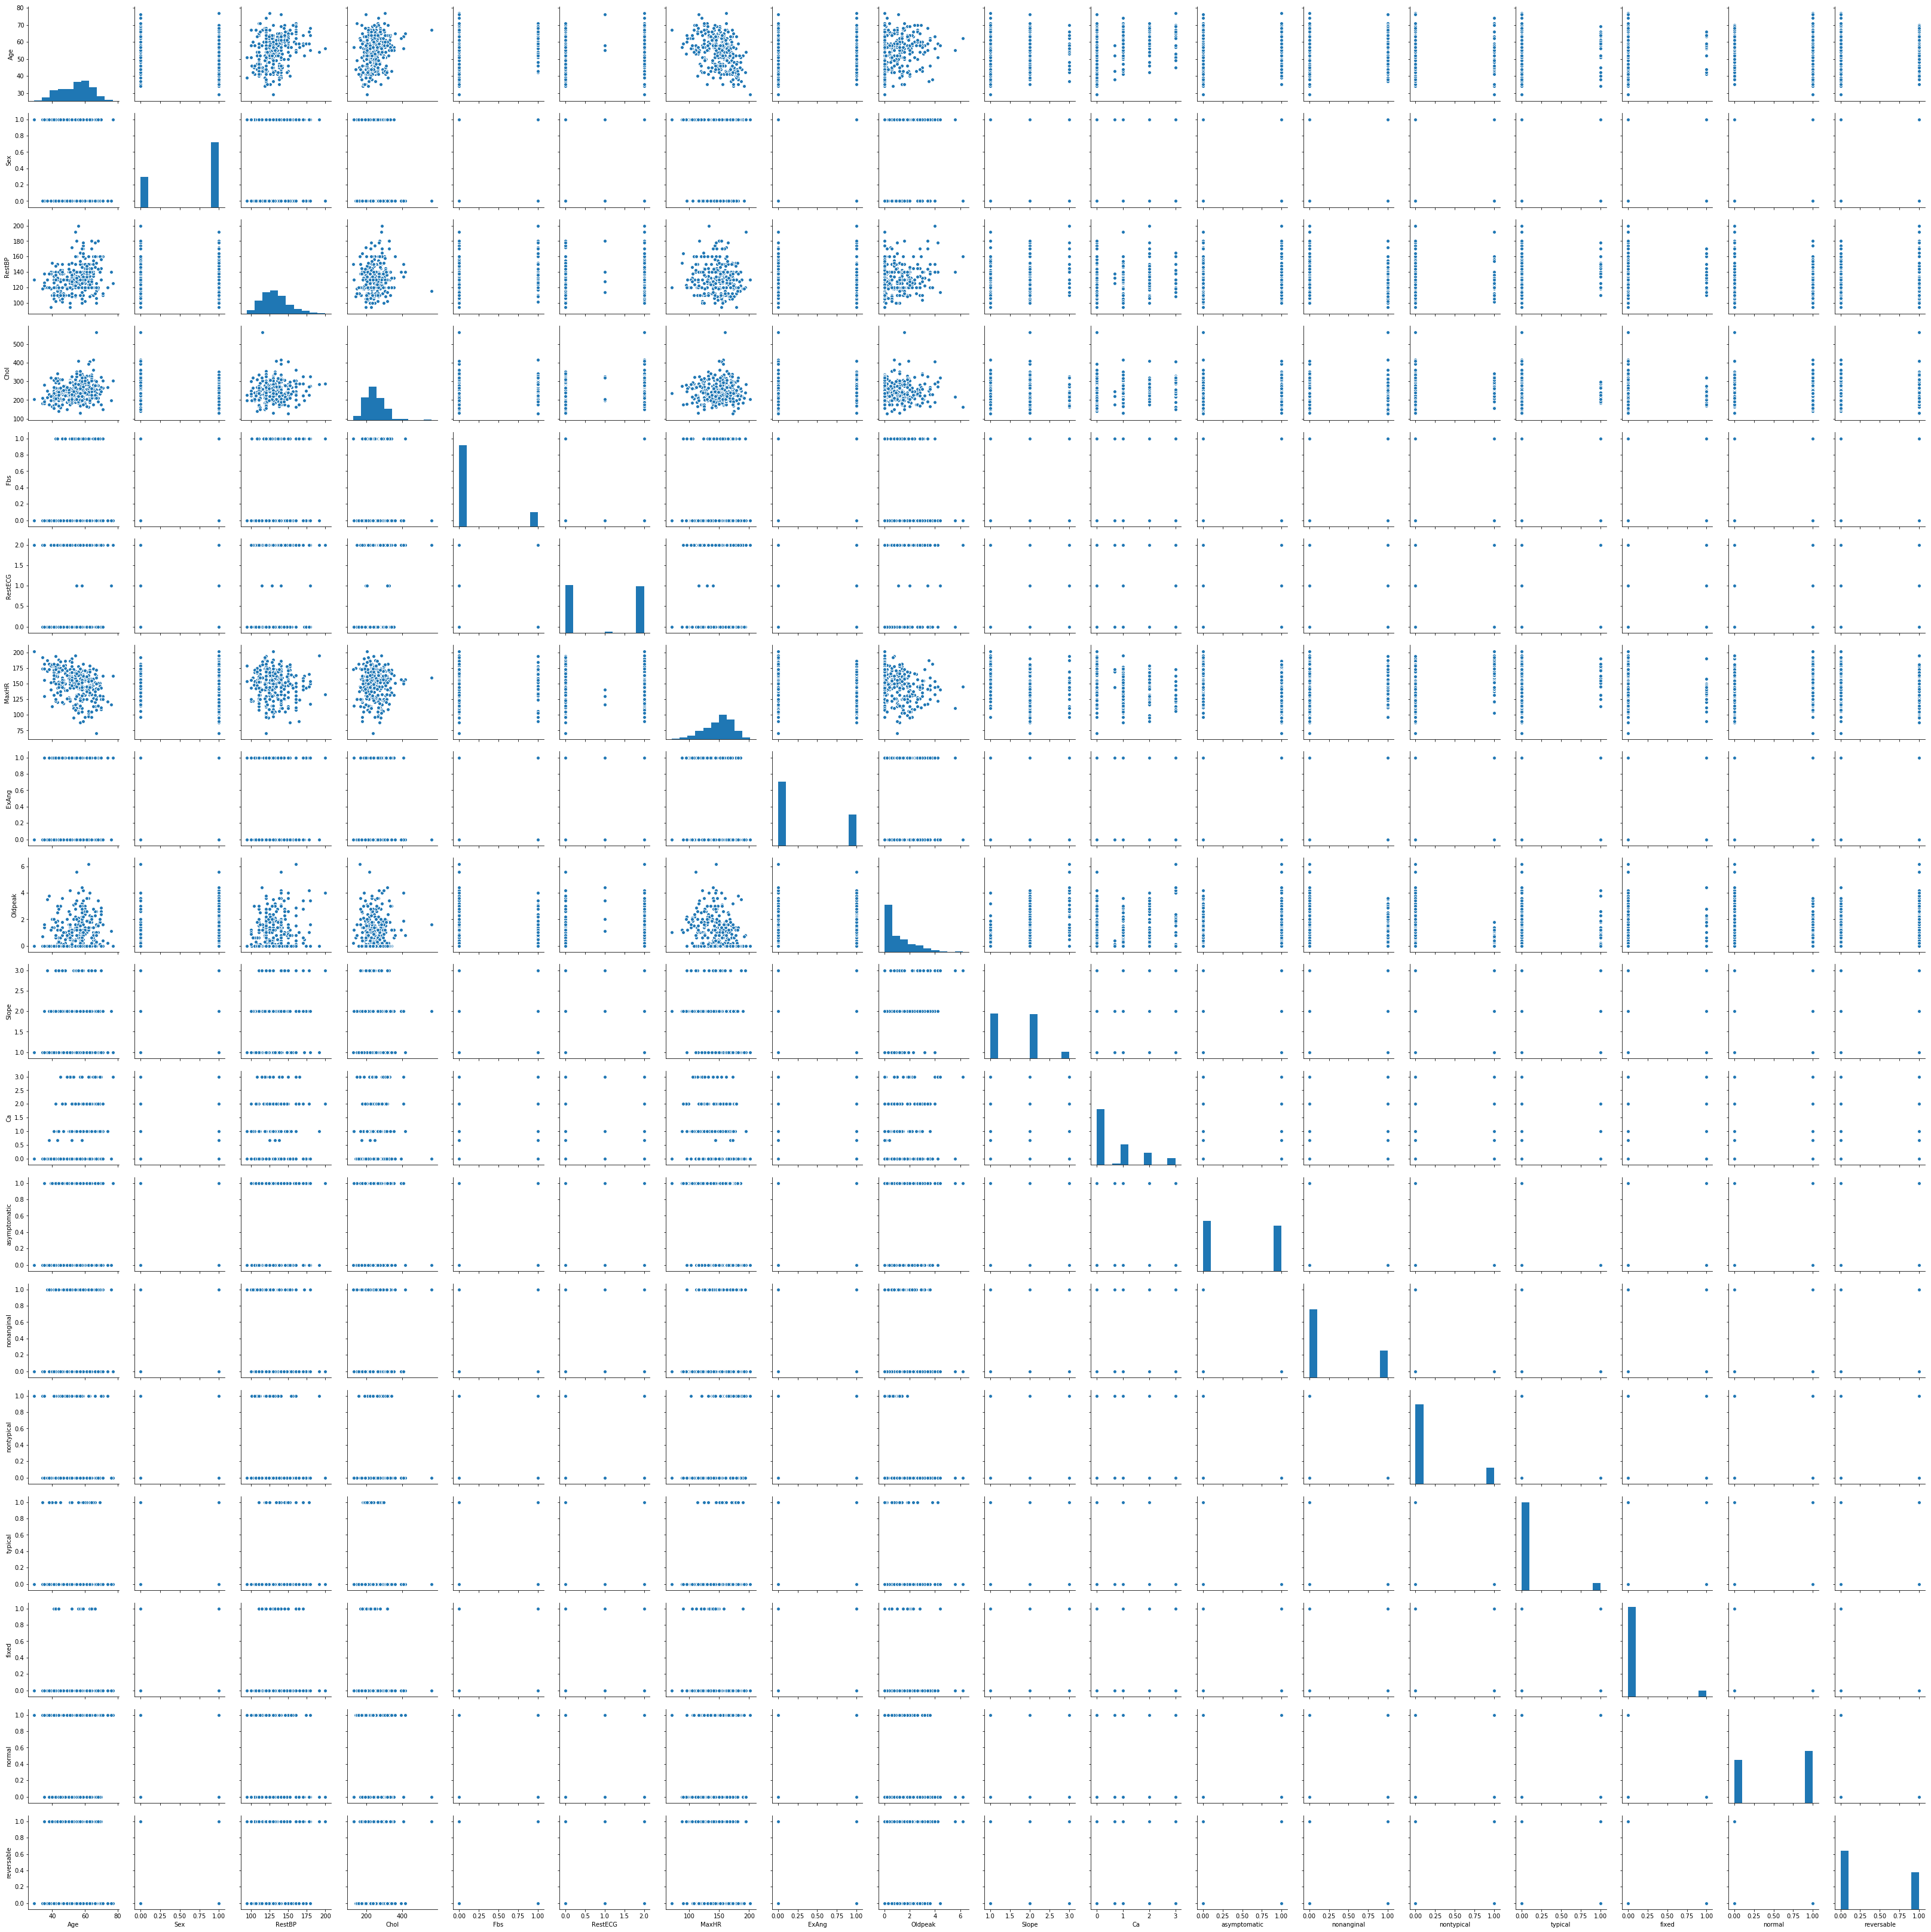

In [42]:
sns.pairplot(data)

In [45]:
data.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,asymptomatic,nonanginal,nontypical,typical,fixed,normal,reversable
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.135337,-0.051714,-0.151684,0.045438,0.062042,-0.129234,0.104902
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.086398,-0.117189,-0.037990,0.089828,0.142524,-0.381754,0.326284
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.027710,-0.050127,-0.083234,0.149737,0.075157,-0.136807,0.106210
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.070343,-0.033223,-0.016453,-0.053021,-0.095743,0.002944,0.053100
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,-0.062929,0.087027,-0.060649,0.055511,0.091351,-0.086774,0.030953
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.122589,-0.089526,-0.102979,0.065581,0.044672,-0.029082,0.007905
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.371989,0.159876,0.249415,0.079683,-0.159523,0.293614,-0.214326
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.464293,-0.266871,-0.233863,-0.093384,0.063073,-0.328539,0.300223
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.274218,-0.126339,-0.277513,0.086959,0.104635,-0.339086,0.302145
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.109618,0.209528,-0.103004,-0.202807,0.064509,0.185825,-0.298671,0.217318
